# Network Analysis

### Author: [Marco Tavora](http://www.marcotavora.me/)

### Introduction

From Wikipedia:

> Network theory is the study of graphs as a representation of either symmetric relations or asymmetric relations between discrete objects. In computer science and network science, network theory is a part of graph theory: a network can be defined as a graph in which nodes and/or edges have attributes (e.g. names).

> Network theory has applications in many disciplines including statistical physics, particle physics, computer science, electrical engineering, biology, economics, finance, operations research, climatology and sociology. Applications of network theory include logistical networks, the World Wide Web, Internet, gene regulatory networks, metabolic networks, social networks, epistemological networks, etc.; see List of network theory topics for more examples.

With nodes and edges representations, systems of completely different nature but similar structure can be compared.


### Eulerian Path

An Eulerian path, is a path which crosses every edge *exactly* once. It exists if and only if:
- Every vertex has even degree
- Exactly two nodes have odd degree

The degree of a vertex is the number of edges incident to the vertex (loops count twice).

### Types of Networks

- Undirected: connections extends in both directions.
- Directed: connections may only flow in one direction.
- Cyclic: contains at least one cycle (node can be connected to itself by traversing at least one edge).
- Acyclic: one that contains no cycles
- Multigraph: multiple links connecting the same pair of nodes.


### Importing libraries

Using the `networkx` library we can work with graphs.

In [4]:
import networkx as nx
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # see the value of multiple statements at once.
import matplotlib.pyplot as plt
%matplotlib inline

From the docs, `nx.Graph` is:
> A base class for undirected graphs. A Graph stores nodes and edges with optional data, or attributes. Graphs hold undirected edges.  Self loops are allowed but multiple (parallel) edges are not. Nodes can be arbitrary (hashable) Python objects with optional key/value attributes. By convention `None` is not used as a node. Edges are represented as links between nodes with optional key/value attributes.

The weight is a numerical value, assigned as a label to a vertex or edge of a graph. From [here](http://networksciencebook.com/2#bridges),

> In mobile call networks the weight can represent the total number of minutes two individuals talk with each other on the phone; on the power grid the weight is the amount of current flowing through a transmission line.

We can build a network with `networkx` where all nodes are connected as follows. 

In [39]:
nodes = ['A','B','C','D']
combs = [list((nodes[i],nodes[j])) for i in range(len(nodes)) for j in range(i+1, len(nodes))]
combs

[['A', 'B'], ['A', 'C'], ['A', 'D'], ['B', 'C'], ['B', 'D'], ['C', 'D']]

We choose for a simplicity random weights:

weight is: 0.1
weight AB is: 0.25
weight AC is: 1.0
weight AD is: 0.25
weight BC is: 0.75
weight BD is: 1.0
weight CD is: 0.5


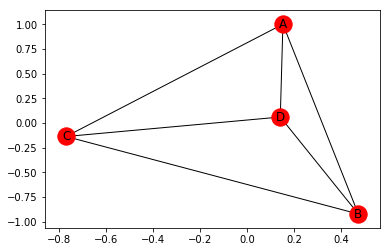

In [43]:
import random
g = nx.Graph()

w = 0.1

print('weight is:',w)
    
for comb in combs:
    g.add_edge(comb[0],comb[1],weight=w)
    w = 0.25*random.randint(1,4)
    print('weight {} is:'.format(comb[0]+comb[1]),w)
    
nx.draw_networkx(g)
plt.show()

Dropping one link:

weight is: 0.1
weight AB is: 1.0
weight AC is: 1.0
weight AD is: 1.0


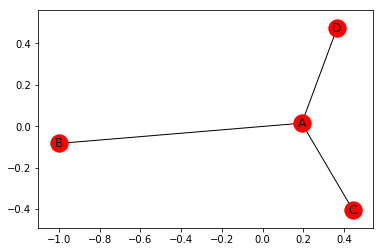

In [47]:
g = nx.Graph()

w = 0.1

print('weight is:',w)
    
for comb in combs[0:3]:
    g.add_edge(comb[0],comb[1],weight=w)
    w = 0.25*random.randint(1,4)
    print('weight {} is:'.format(comb[0]+comb[1]),w)
    
nx.draw_networkx(g)
plt.show()

To compute the shortest paths and their lengths we use:

In [49]:
nx.shortest_path(g,'B','D')
nx.shortest_path_length(g,'B','D')

['B', 'A', 'D']

2

A complete graph is an undirected graph where every pair of vertices is connected by a unique edge.

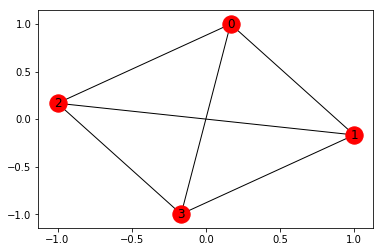

In [54]:
k_4 = nx.complete_graph(4)
nx.draw_networkx(k_4)

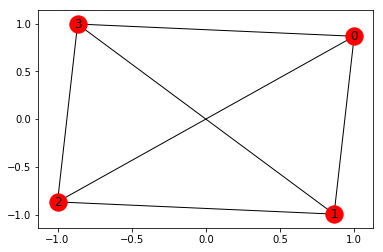

In [55]:
l_4 = nx.complete_graph(4)
nx.draw_networkx(l_4)

Isomorphic graphs can be twisted (i.e. without cutting or gluing) to look exactly like each other.

In [56]:
nx.is_isomorphic(k_4,l_4)

True